In [1]:
import sys
sys.path.append("..")

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from graphstructure.metrics import DiscriminatorOneClassFAMD


In [3]:
doc = DiscriminatorOneClassFAMD(gamma="scale", nu=0.2)

{'NONE': 0, 'H': 1, 'Z': 2, 'IZ': 3, 'ZH': 4, 'IZH': 5, 'K': 6, 'X': 7, 'XH': 8}
Dropped brace5 because of 0 var
Dropped layer_height4 because of 0 var
FAMD detected categorical columns Index(['legs', 'n_layers', 'brace0', 'brace1', 'brace2', 'brace3', 'brace4'], dtype='object')
FAMD detected continuous columns Index(['total_height', 'radius_bottom', 'radius_top', 'layer_height0',
       'layer_height1', 'layer_height2', 'layer_height3'],
      dtype='object')
FAMD detected categorical columns Index(['legs', 'n_layers', 'brace0', 'brace1', 'brace2', 'brace3', 'brace4'], dtype='object')
FAMD detected continuous columns Index(['total_height', 'radius_bottom', 'radius_top', 'layer_height0',
       'layer_height1', 'layer_height2', 'layer_height3'],
      dtype='object')
MCA PROCESS ELIMINATED 5  COLUMNS SINCE THEIR MISS_RATES >= 99%


/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [4]:
# import json
# with open("optimal_run_pop_100_gen_2000_plausibility_FAMD one class svm_weighted_10000.json") as f:
#     ga_plaus_famd_svm_weighted_1000 = json.load(f)

In [5]:
# synthetic_reduced = np.array([list(doc.famd.transform(d)[0]) for d in ga_plaus_famd_svm_weighted_1000])

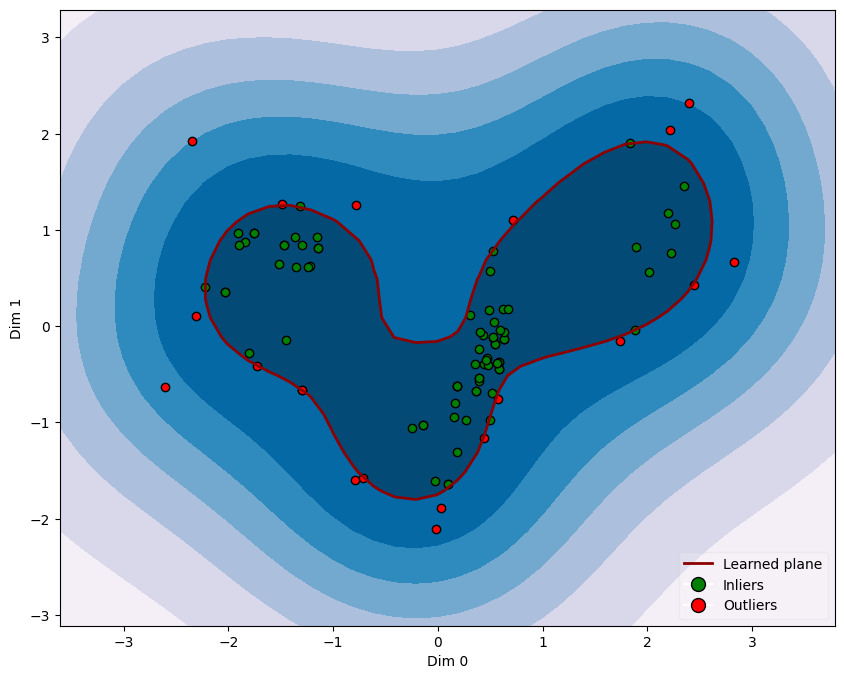

In [6]:
from matplotlib.lines import Line2D
# extract the model predictions
x_reduced = doc.transformed_training_data

fig = plt.figure(figsize=(10,8))

# all_points = [x_reduced, synthetic_reduced]
all_points = [x_reduced]
all_markers = ["o", "X"]
all_names = ["real", "GA"]
normal_color = "green"
abnormal_color = "red"
concatenated = np.concatenate(all_points)

all_predictions = []

for reduced in all_points:
    all_predictions.append(doc.clf.predict(reduced))
# define the meshgrid
x_min, x_max = concatenated[:, 0].min() - 1, concatenated[:, 0].max() + 1
y_min, y_max = concatenated[:, 1].min() - 1, concatenated[:, 1].max() + 1
h = 0.2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# evaluate the decision function on the meshgrid
z = doc.clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)

# plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')
legend_elements = [Line2D([0], [0], color='darkred', lw=2, label='Learned plane')]

for reduced, predicted, marker, name in zip(all_points, all_predictions, all_markers, all_names) :
    plt.scatter(reduced[predicted == 1, 0], reduced[predicted == 1, 1], c=normal_color, edgecolors="k", marker=marker)
    plt.scatter(reduced[predicted == -1, 0], reduced[predicted == -1, 1], c=abnormal_color, edgecolors="k", marker=marker)
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=normal_color, markersize=10, label='Inliers'.format(name), markeredgecolor="k"))
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=abnormal_color, markersize=10, label='Outliers'.format(name), markeredgecolor="k"))
    indices_normal = np.where(predicted == 1)[0]

plt.xlabel("Dim 0")
plt.ylabel("Dim 1")
plt.legend(handles=legend_elements, loc='lower right', framealpha=0.2)
plt.axis('tight')
plt.savefig("svm_plot.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()

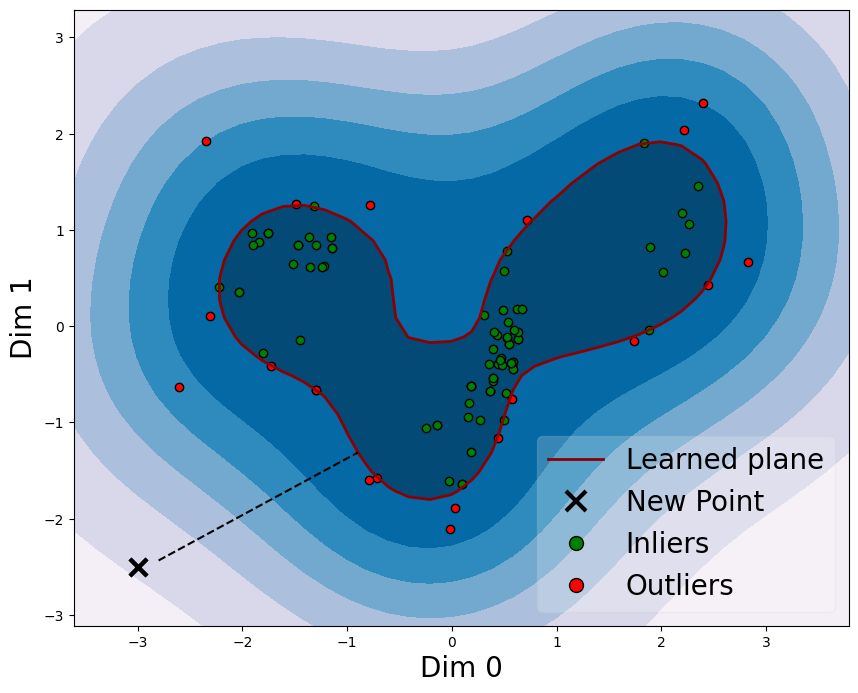

In [7]:
fig = plt.figure(figsize=(10,8))
fontsize = 20

# Add a new point at (-2, -2)
# all_points.append(new_point)

# Predict the label for the new point
new_point = np.array([[-3, -2.5]])

# Plot the decision function and the reduced data
plt.contourf(xx, yy, z, cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, z, levels=[0], linewidths=2, colors='darkred')

# Plot the new point
# plt.scatter(new_point[:, 0], new_point[:, 1], c='blue', marker='x', s=200, label='New Point')

# Draw a line to the learned plane
plt.scatter([new_point[0, 0], new_point[0, 0]], [new_point[0, 1], new_point[0, 1]], color='black', marker='x', s=150, linewidths=3)

legend_elements = [Line2D([0], [0], color='darkred', lw=2, label='Learned plane'),
                   Line2D([0], [0], marker='x', color='black', markerfacecolor='black', markersize=15, label='New Point', markeredgecolor="black", linestyle='None', markeredgewidth=3)]


# Find the closest point on the first level of the contour to the new point
contour_points = a.collections[0].get_paths()[0].vertices

distances = np.sqrt((contour_points[:, 0] - new_point[0, 0])**2 + (contour_points[:, 1] - new_point[0, 1])**2)
closest_point_index = np.argmin(distances)
closest_point = contour_points[closest_point_index]

offset = 0.2  # You can adjust this offset based on your preference
start_point = [new_point[0, 0] + offset, new_point[0, 1] + offset/3]

# Draw a dashed line from the new point to the closest point on the first level of the contour
plt.plot([start_point[0], closest_point[0]], [start_point[1], closest_point[1]], linestyle='dashed', color='black')


for reduced, predicted, marker, name in zip(all_points, all_predictions, all_markers, all_names):
    plt.scatter(reduced[predicted == 1, 0], reduced[predicted == 1, 1], c=normal_color, edgecolors="k", marker=marker)
    plt.scatter(reduced[predicted == -1, 0], reduced[predicted == -1, 1], c=abnormal_color, edgecolors="k", marker=marker)
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=normal_color, markersize=10, label='Inliers'.format(name), markeredgecolor="k", linestyle='None'))
    legend_elements.append(Line2D([0], [0], marker=marker, color='w', markerfacecolor=abnormal_color, markersize=10, label='Outliers'.format(name), markeredgecolor="k", linestyle='None'))
    indices_normal = np.where(predicted == 1)[0]

plt.xlabel("Dim 0", fontsize=fontsize)
plt.ylabel("Dim 1", fontsize=fontsize)
plt.legend(handles=legend_elements, loc='lower right', framealpha=0.2, fontsize=fontsize)
plt.axis('tight')
plt.savefig("svm_plot.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


/home/panagiotou/anaconda3/envs/samplestructures/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 1000x800 with 0 Axes>

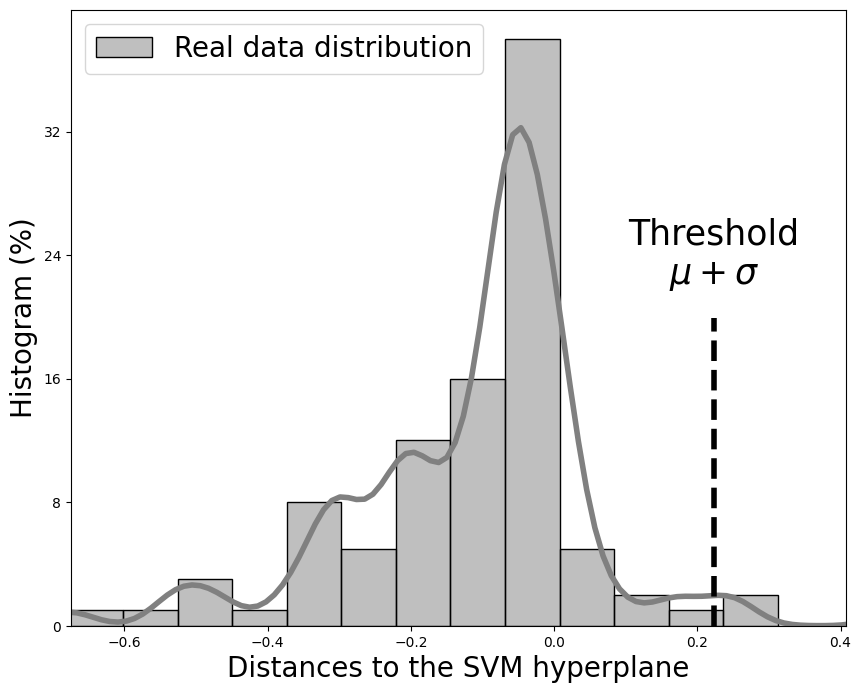

In [9]:
import seaborn as sns
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10,8))

dists = -1*doc.clf.decision_function(x_reduced)


m = np.median(dists)
s = np.std(dists)
thr = m+s

# sns.histplot(dists, kde=True, bins=20, color="grey", stat="percent")
# plt.axvline(x=thr, ymin=0, ymax=0.5,
#             color='black', linestyle='--')
# plt.annotate(r'$\text{Threshold}$' + '\n' + r'$\mu + \sigma$', xy=(thr, 10), xytext=(thr, 12), fontsize=12, ha='center', va='center')



from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(10,8))
fontsize = 20


sns.histplot(dists, kde=True, bins=30, color="grey", stat="percent", label="Real data distribution", line_kws={'linewidth': 4}, kde_kws={"bw_adjust":0.3})
plt.axvline(x=thr, ymin=0, ymax=0.5,
            color='black', linestyle='--', linewidth=4)
plt.annotate('Threshold' + '\n' + '$\mu + \sigma$', xy=(thr, 24), xytext=(thr, 24), fontsize=fontsize+5, ha='center', va='center')

q1 = np.percentile(dists, 15)
q3 = np.percentile(dists, 85)
min_x = q1 - 1.5 * (q3 - q1)
max_x = q3 + 1.5 * (q3 - q1)

# Set x-axis limits
plt.xlim(min_x, max_x)

# plt.xticks([], fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.ylabel('Histogram (%)', fontsize=fontsize)
plt.xlabel('Distances to the SVM hyperplane', fontsize=fontsize)
plt.legend(fontsize=fontsize)
ax = plt.gca()
ax.yaxis.set_major_locator(MaxNLocator(integer=True, nbins=5))
plt.savefig("svm_distr.png", dpi=300, bbox_inches="tight", pad_inches=0)
plt.show()


In [ ]:
# for index in indices_normal:
#     print(ga_plaus_famd_svm_weighted_1000[index])